In [1]:
import numpy as np
from scipy import optimize
import pandas as pd
from pyswarm import pso
import matplotlib.pyplot as plt

In [22]:
f = lambda x: 1/(x**2 -3*x +2)

In [23]:
def generate_data(function, k):
    x = [3*item/1000 for item in range(k+1)]
    s = np.random.normal(0, 1, 1001)
    y = []
    for x_i, s_i in zip(x,s):
        if (function(x_i) < -100):
            y.append(-100 + s_i)
        if (-100 <= function(x_i) <= 100):
            y.append(function(x_i) + s_i)
        if (function(x_i) > 100):
            y.append(100 + s_i)
    return np.array([x, y])

In [24]:
eps = 0.001
max_iterations = 1000
n = 1000
data = generate_data(f, n)

In [25]:
def F_function(values):
    a,b,c,d = values
    x = data[0]
    return (a*x + b)/(x**2 + c*x + d)

In [26]:
def D_function(values, shape = "float"):
    a,b,c,d = values
    x, y = data[0], data[1]
    F_val = F_function(values)
    return ((F_val - y)**2).sum()

In [27]:
def D_derivative(values, shape='float'):
    x = data[0]
    y = data[0]
    a, b, c, d = values
    
    F_a_1 = x / (x ** 2 + c * x + d)
    F_b_1 = 1 / (x ** 2 + c * x + d)
    F_c_1 = - x * (a * x + b) / (x * (c + x) + d) ** 2
    F_d_1 = - (a * x + b) / (x * (c + x) + d) ** 2
    
    F_a_2 = (2 * x * (a * x + b) / (x * (c + x) + d) ** 2).sum()
    F_b_2 = (2 * (a * x + b) / (x * (c + x) + d) ** 2).sum()
    F_c_2 = (- 2 * x * (a * x + b) ** 2 / (x * (c + x) + d) ** 3).sum()
    F_d_2 = (- 2 * (a * x + b) ** 2 / (x * (c + x) + d) ** 3).sum()
    
    D_a = F_a_2 - (2 * y * F_a_1).sum()
    D_b = F_b_2 - (2 * y * F_b_1).sum()
    D_c = F_c_2 - (2 * y * F_c_1).sum()
    D_d = F_d_2 - (2 * y * F_d_1).sum()
    return [D_a, D_b, D_c, D_d]

In [28]:
bounds = [(-5,5), (-5, 5), (-5, 5), (-5, 5)]
de = optimize.differential_evolution(D_function, bounds, tol=eps)

In [29]:
lm = optimize.least_squares(D_function, [-2., 1, 1, -2],jac = D_derivative)

In [30]:
nm = optimize.minimize(D_function, [-2., 1, 1, -2], method='Nelder-Mead',tol=1e-100)

In [31]:
pso_result = pso(D_function, [-1000, -1000, -1000, -1000],[1000, 1000, 1000, 1000], maxiter = max_iterations)

Stopping search: Swarm best position change less than 1e-08


In [32]:
pd.DataFrame([['Nelder-Mead', D_function(nm.x), nm.x, nm.nit],
              ['Differential evolution', D_function(de.x), de.x, de.nit],
              ['Levenberg-Marquardt', D_function(lm.x), lm.x, lm.nfev],
              ['Particle Swarm Optimization', D_function(pso_result[0]), pso_result[0], max_iterations]], columns = ['Method', 'Residuals','x', 'nit'])

,Method,Residuals,x,nit
0,Nelder-Mead,198554.473089,"[-4.81855179991253, 1.52133001843302, 11.00625...",452
1,Differential evolution,137014.357759,"[-1.0016309787823656, 1.0021068701995015, -2.0...",152
2,Levenberg-Marquardt,205635.289084,"[-1.9999657240617463, 1.0000341130296029, 0.99...",24
3,Particle Swarm Optimization,246292.912682,"[444.3109669575919, -424.67718067702367, -451....",1000


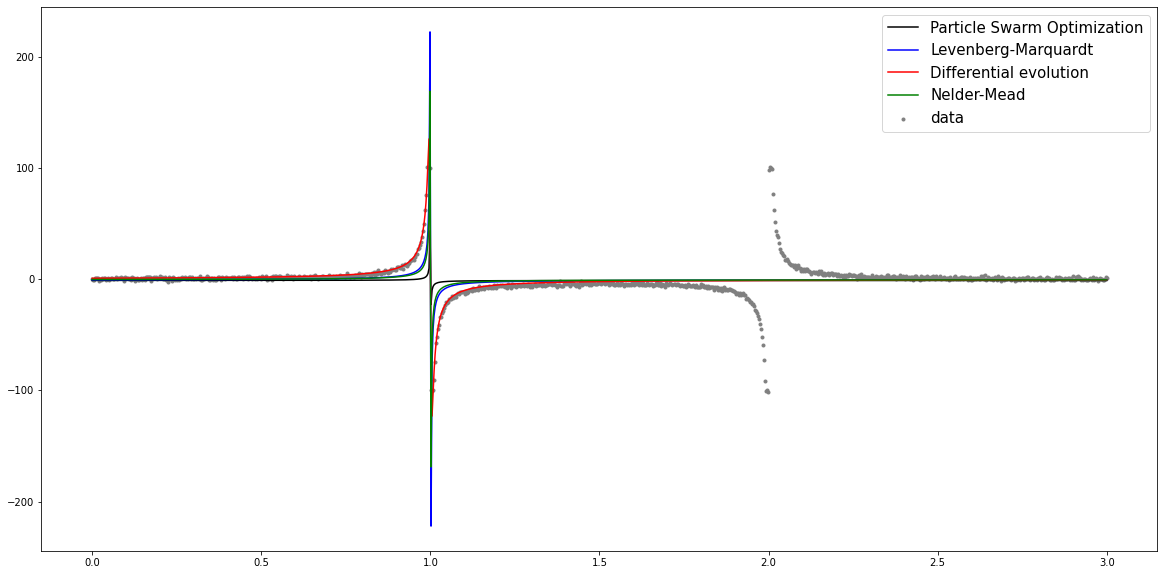

In [55]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(data[0], data[1], label = 'data', marker='.', color="grey")
plt.plot(data[0], F_function(pso_result[0]), color ="black", label ="Particle Swarm Optimization")
plt.plot(data[0], F_function(lm.x), color ="blue", label ="Levenberg-Marquardt")
plt.plot(data[0], F_function(de.x), color ="red", label ="Differential evolution")
plt.plot(data[0], F_function(nm.x), color ="green", label ="Nelder-Mead")
plt.legend(prop={'size': 15})
plt.savefig("pictures/"+"plot_approximation"+".png")

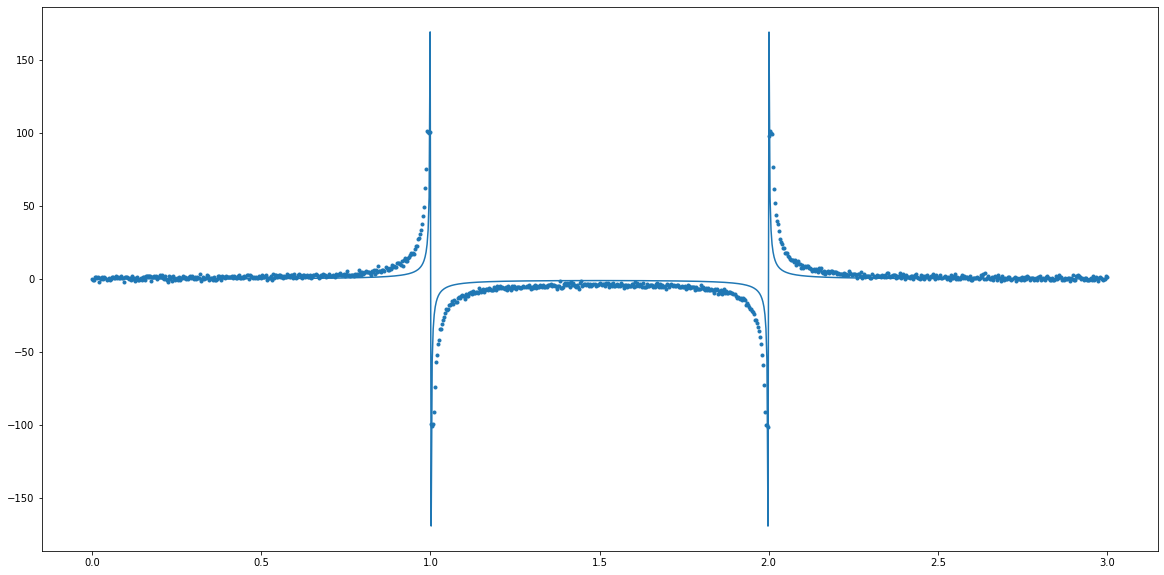

In [56]:
plt.scatter(data[0], data[1], label = 'data', marker='.')
plt.plot(data[0], F_function([-4.35039247e-05, 0.253579643, -2.99999936, 2.00049613]))
plt.savefig("pictures/"+"plot_near_min"+".png")